In [15]:
from  urllib import request
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
!pip install nltk
import nltk
from nltk.corpus import stopwords
from collections import Counter
import re
from wordcloud import WordCloud, STOPWORDS



In [16]:
analysis_df = pd.read_csv('english_df.csv')
analysis_df.head(5)


,title,artist,winner,year,lyrics,preprocessed_lyrics,language,anger_pct,anticipation_pct,disgust_pct,fear_pct,joy_pct,negative_pct,positive_pct,sadness_pct,surprise_pct,trust_pct,gloom_index
0,If I Ever Lose My Faith In You (Single),Sting,0,1993,Sorrow (syrup rmx) LyricsYea\nUh huh\nAbstract...,sorrow ( syrup rmx ) lyricsyea Uh huh abstract...,en,0.047511,0.067873,0.052036,0.095023,0.049774,0.117647,0.088235,0.076923,0.033937,0.063348,100.000000
1,Bad Guy,Billie Eilish,1,2019,TranslationsHrvatskiTürkçeSvenskaEspañolРусски...,translationshrvatskitürkçesvenskaespañolрусски...,en,0.074074,0.027778,0.074074,0.074074,0.023148,0.087963,0.023148,0.087963,0.013889,0.023148,87.623281
2,Help Me (Single),Joni Mitchell,0,1974,Lilith Lyrics[Verse 1]\nSeptember\nDont rain o...,lilith lyric [ vers 1 ] septemb dont rain dont...,en,0.018750,0.050000,0.025000,0.081250,0.037500,0.100000,0.050000,0.081250,0.012500,0.043750,84.932747
3,Not Ready To Make Nice,Dixie Chicks,1,2006,Not Ready to Make Nice Lyrics[Verse 1]\nForgiv...,"readi make nice lyric [ vers 1 ] forgiv , soun...",en,0.054852,0.054852,0.054852,0.063291,0.037975,0.101266,0.042194,0.084388,0.012658,0.042194,84.700788
4,Witchcraft (Single),Frank Sinatra,0,1958,Sweetest Maleficia Lyrics[Gilles de Rais:]\nI ...,sweetest maleficia lyric [ gill de rai : ] con...,en,0.047138,0.050505,0.060606,0.080808,0.037037,0.097643,0.067340,0.063973,0.016835,0.047138,83.425519


Word count.

In [17]:
stop = set(nltk.corpus.stopwords.words('english'))

In [18]:
# stem lyrics
analysis_df['preprocessed_lyrics'] = analysis_df['preprocessed_lyrics'].str.replace(r'[^a-zA-Z\s]', '')
analysis_df['preprocessed_lyrics'] = analysis_df['preprocessed_lyrics'].str.lower().str.split()
analysis_df['preprocessed_lyrics'] = analysis_df['preprocessed_lyrics'].apply(lambda x: [item for item in x if item not in stop])

# get word count
analysis_df['word_count'] = analysis_df['preprocessed_lyrics'].str.len()
analysis_df = analysis_df[analysis_df['word_count'] <= 500]
analysis_df.head()

<ipython-input-18-625ede49e92f>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  analysis_df['preprocessed_lyrics'] = analysis_df['preprocessed_lyrics'].str.replace(r'[^a-zA-Z\s]', '')


,title,artist,winner,year,lyrics,preprocessed_lyrics,language,anger_pct,anticipation_pct,disgust_pct,fear_pct,joy_pct,negative_pct,positive_pct,sadness_pct,surprise_pct,trust_pct,gloom_index,word_count
0,If I Ever Lose My Faith In You (Single),Sting,0,1993,Sorrow (syrup rmx) LyricsYea\nUh huh\nAbstract...,"[sorrow, syrup, rmx, lyricsyea, uh, huh, abstr...",en,0.047511,0.067873,0.052036,0.095023,0.049774,0.117647,0.088235,0.076923,0.033937,0.063348,100.000000,392
1,Bad Guy,Billie Eilish,1,2019,TranslationsHrvatskiTürkçeSvenskaEspañolРусски...,[translationshrvatskitrkesvenskaespaolromnport...,en,0.074074,0.027778,0.074074,0.074074,0.023148,0.087963,0.023148,0.087963,0.013889,0.023148,87.623281,161
2,Help Me (Single),Joni Mitchell,0,1974,Lilith Lyrics[Verse 1]\nSeptember\nDont rain o...,"[lilith, lyric, vers, septemb, dont, rain, don...",en,0.018750,0.050000,0.025000,0.081250,0.037500,0.100000,0.050000,0.081250,0.012500,0.043750,84.932747,137
3,Not Ready To Make Nice,Dixie Chicks,1,2006,Not Ready to Make Nice Lyrics[Verse 1]\nForgiv...,"[readi, make, nice, lyric, vers, forgiv, sound...",en,0.054852,0.054852,0.054852,0.063291,0.037975,0.101266,0.042194,0.084388,0.012658,0.042194,84.700788,178
4,Witchcraft (Single),Frank Sinatra,0,1958,Sweetest Maleficia Lyrics[Gilles de Rais:]\nI ...,"[sweetest, maleficia, lyric, gill, de, rai, co...",en,0.047138,0.050505,0.060606,0.080808,0.037037,0.097643,0.067340,0.063973,0.016835,0.047138,83.425519,273


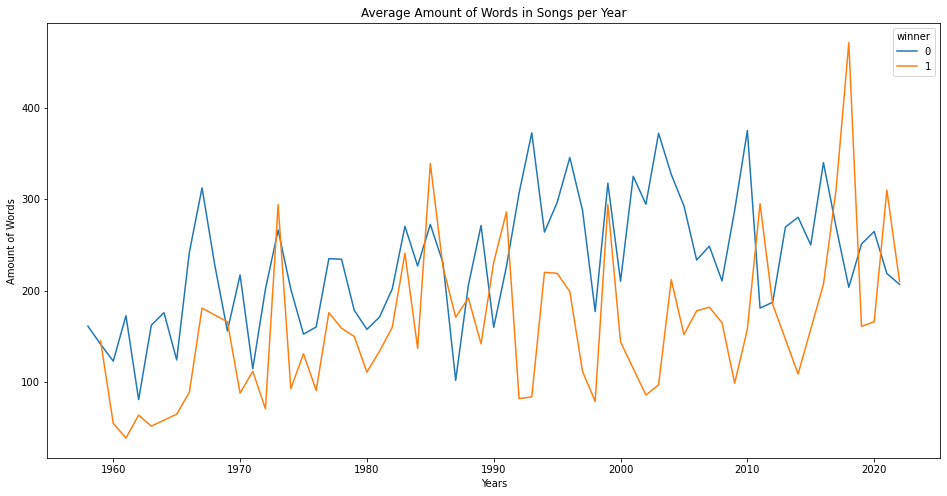

In [19]:
# Plot the average word count for each year
plt.figure(figsize=(16,8))
sns.lineplot(data=analysis_df, x='year', y='word_count', hue='winner', ci=None)
plt.title('Average Amount of Words in Songs per Year')
plt.xlabel('Years')
plt.ylabel('Amount of Words')
plt.savefig("words_count.png", bbox_inches='tight')
plt.show()


In [20]:
def count_unique_words(lst):
    return len(set(lst))

# apply the function to create a new column
analysis_df['unique_word_count'] = analysis_df['preprocessed_lyrics'].apply(lambda x: count_unique_words(x))


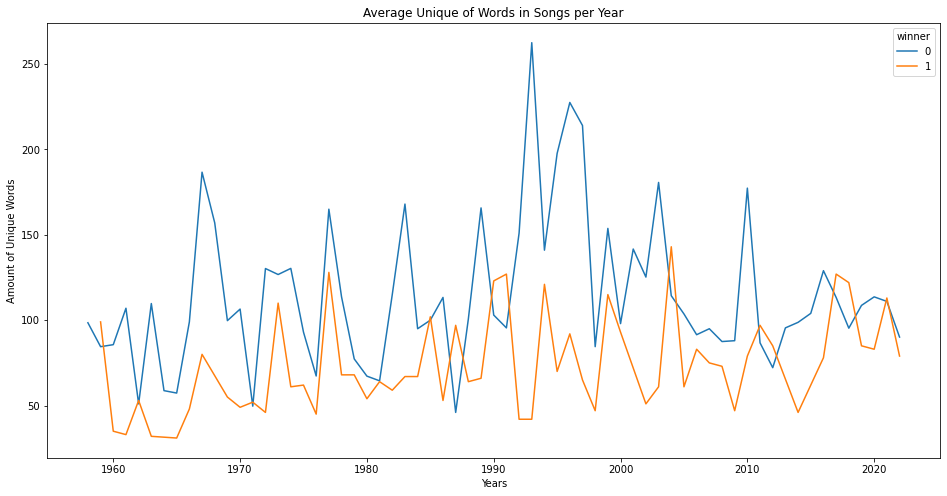

In [21]:
# Plot the average amount of unique words each year
plt.figure(figsize=(16,8))
sns.lineplot(data=analysis_df, x='year', y='unique_word_count', hue='winner', ci=None)
plt.title('Average Unique of Words in Songs per Year')
plt.xlabel('Years')
plt.ylabel('Amount of Unique Words')
plt.savefig("unique_word_count.png", bbox_inches='tight')
plt.show()


Profanity over the decades.

In [22]:
# add decades detail
# Define the decade-to-year range mapping
decade_map = {'50s': (1950, 1960),
              '60s': (1960, 1970),
              '70s': (1970, 1980),
              '80s': (1980, 1990),
              '90s': (1990, 2000),
              '00s': (2000, 2010),
              '10s': (2010, 2020),
              '20s': (2020, 2030)}

# Apply the mapping using the `map()` method
def get_decade(year):
    for key, value in decade_map.items():
        if value[0] <= year < value[1]:
            return key
    return 'unknown'

analysis_df['decade'] = analysis_df['year'].apply(get_decade)

In [23]:
decades = ['50s', '60s', '70s', '80s', '90s', '00s', '10s', '20s']
common_words = {}

for decade in decades:
    # Filter the DataFrame by decade
    df_decade = analysis_df.loc[analysis_df['decade'] == decade]
    # Join the cleaned lyrics of all songs in the decade
    for i in range(len(df_decade['preprocessed_lyrics'])):
        lyrics = ' '.join(df_decade['preprocessed_lyrics'].iloc[0]).split()
    # Count the occurrences of each word and take the 200 most common words
        common_words[decade] = Counter(lyrics).most_common(200)

commonWords50 = common_words['50s']
commonWords60 = common_words['60s']
commonWords70 = common_words['70s']
commonWords80 = common_words['80s']
commonWords90 = common_words['90s']
commonWords00 = common_words['00s']
commonWords10 = common_words['10s']
commonWords20 = common_words['20s']

https://github.com/coffee-and-fun/google-profanity-words

In [24]:
url  = 'https://raw.githubusercontent.com/coffee-and-fun/google-profanity-words/main/data/list.txt'
google_profanity_words = request.urlopen(url)

profane_words = []
for line in google_profanity_words:
    profane_words.append(line.decode("utf-8").strip())

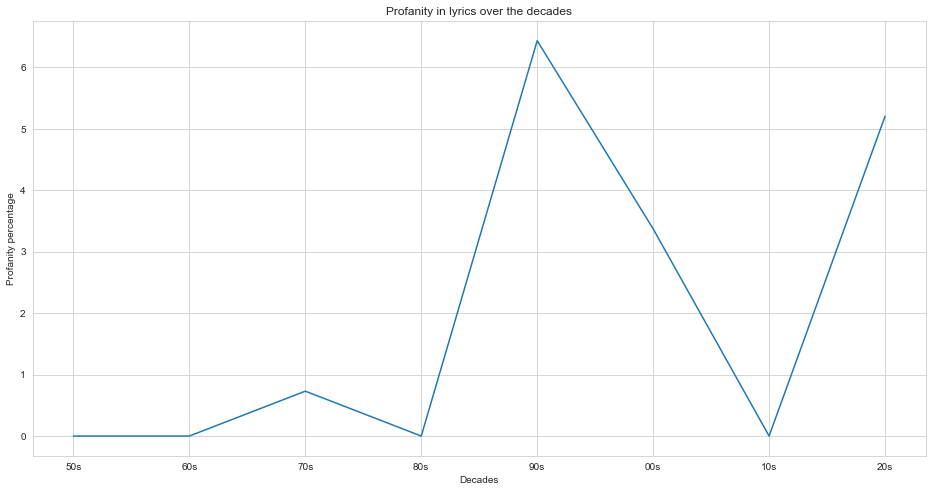

In [25]:
commonWords = [commonWords50, commonWords60, commonWords70, commonWords80, commonWords90, commonWords00, commonWords10, commonWords20]
counts = []
for item in commonWords:
    totalCount = 0
    count = 0
    for key,value in item:
        if key in profane_words:
            count += value
        totalCount += value
    counts.append(count/totalCount * 100)

profanity_dict = {}
for i, decade in enumerate(decades):
    profanity_dict[decade] = counts[i]

profanity_df = pd.DataFrame.from_dict(profanity_dict, orient='index', columns=['Profanity Percentage'])

sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
sns.lineplot(data=profanity_df, x=profanity_df.index, y='Profanity Percentage')
plt.title("Profanity in lyrics over the decades")
plt.xlabel("Decades")
plt.ylabel("Profanity percentage")
plt.savefig("profanity.png", bbox_inches='tight')
plt.show()




Wordcloud.

In [26]:
winner_df = analysis_df[analysis_df.winner==1]
nominee_df = analysis_df[analysis_df.winner==0]

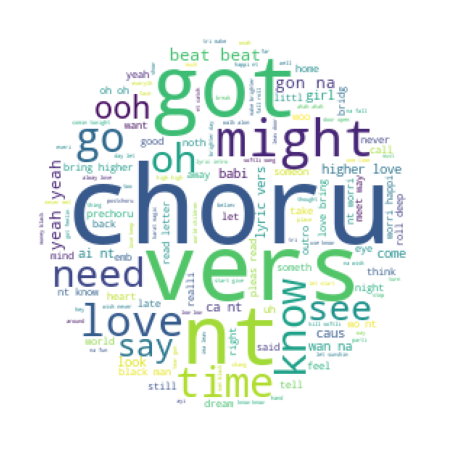

In [27]:
#convert list to string and generate

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

unique_string = ' '.join(winner_df['preprocessed_lyrics'].sum())
wordcloud = WordCloud(background_color="white",
                      mask=mask,
                      width = 1000,
                      height = 500).generate(unique_string)
plt.figure(figsize=(19,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("wordcloud_winner.png", bbox_inches='tight')
plt.show()
plt.close()

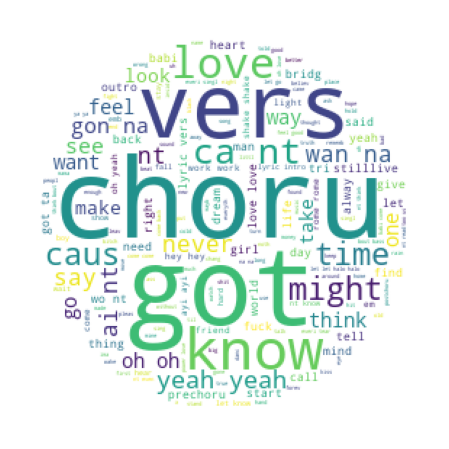

In [28]:
#convert list to string and generate

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

unique_string = ' '.join(nominee_df['preprocessed_lyrics'].sum())
wordcloud = WordCloud(background_color="white",
                      mask=mask,
                      width = 1000,
                      height = 500).generate(unique_string)
plt.figure(figsize=(19,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("wordcloud_nominees.png", bbox_inches='tight')
plt.show()
plt.close()

Multiple Grammy winners.
Can you guess who has won more than 1 Grammy Best Record?

In [29]:
dupes = analysis_df[analysis_df.winner==1]
dupes = dupes[dupes['artist'].duplicated(keep=False)]
dupes.sort_values('artist')

,title,artist,winner,year,lyrics,preprocessed_lyrics,language,anger_pct,anticipation_pct,disgust_pct,...,joy_pct,negative_pct,positive_pct,sadness_pct,surprise_pct,trust_pct,gloom_index,word_count,unique_word_count,decade
205,"Up, Up And Away",5th Dimension,1,1967,TranslationsItalianoРусскийFrançaisNederlandsD...,[translationsitalianofranaisnederlandsdeutsche...,en,0.000001,0.023166,0.000001,...,0.015444,0.023166,0.046332,0.019305,0.000001,0.015444,24.318901,181,80,60s
292,Aquarius/Let The Sunshine In (The Flesh Failures),5th Dimension,1,1969,Aquarius / Let the Sunshine In (The Flesh Fail...,"[aquariu, let, sunshin, flesh, failur, lyric, ...",en,0.004255,0.021277,0.008511,...,0.034043,0.068085,0.076596,0.000001,0.012766,0.029787,12.581533,166,55,60s
114,Rolling In The Deep,Adele,1,2011,TranslationsFrançaisEspañolPortuguêsΕλληνικάRo...,"[translationsfranaisespaolportugusrol, deep, l...",en,0.014218,0.011848,0.014218,...,0.018957,0.045024,0.030806,0.045024,0.000001,0.014218,34.834512,295,97,10s
314,Hello,Adele,1,2016,TranslationsTürkçePortuguêsPortuguêsEspañolHel...,"[translationstrkeportugusportugusespaolhello, ...",en,0.000001,0.027439,0.000001,...,0.012195,0.006098,0.018293,0.009146,0.012195,0.012195,8.840632,207,78,10s
1,Bad Guy,Billie Eilish,1,2019,TranslationsHrvatskiTürkçeSvenskaEspañolРусски...,[translationshrvatskitrkesvenskaespaolromnport...,en,0.074074,0.027778,0.074074,...,0.023148,0.087963,0.023148,0.087963,0.013889,0.023148,87.623281,161,85,10s
97,Everything I Wanted,Billie Eilish,1,2020,TranslationsTürkçeEspañolРусскийRomânăPortuguê...,[translationstrkeespaolromnportuguspolskinorsk...,en,0.026432,0.017621,0.017621,...,0.008811,0.039648,0.017621,0.039648,0.004405,0.004405,37.293095,166,83,20s
13,Change The World,Eric Clapton,1,1996,TranslationsTürkçeEspañolPolskiItalianoFrançai...,[translationstrkeespaolpolskiitalianofranaisne...,en,0.058219,0.061644,0.030822,...,0.023973,0.068493,0.078767,0.051370,0.023973,0.034247,61.211024,199,92,90s
308,Tears In Heaven,Eric Clapton,1,1992,Tears in Heaven Lyrics[Verse 1]\nWould you kno...,"[tear, heaven, lyric, vers, would, know, name,...",en,0.000001,0.026316,0.000001,...,0.000001,0.017544,0.000000,0.017544,0.008772,0.000001,9.567887,82,42,90s
171,Days Of Wine And Roses,Henry Mancini,1,1963,Days of Wine and Roses LyricsThe days of wine ...,"[day, wine, rose, lyricsth, day, wine, rose, l...",en,0.000001,0.017857,0.000001,...,0.071429,0.000001,0.107143,0.035714,0.053571,0.053571,27.995860,52,32,60s
207,Moon River,Henry Mancini,1,1961,TranslationsEspañolMoon River Lyrics[Verse]\nM...,"[translationsespaolmoon, river, lyric, vers, m...",en,0.020408,0.020408,0.000001,...,0.020408,0.040816,0.020408,0.020408,0.000001,0.020408,24.188870,39,33,60s


Gloom Index by year.

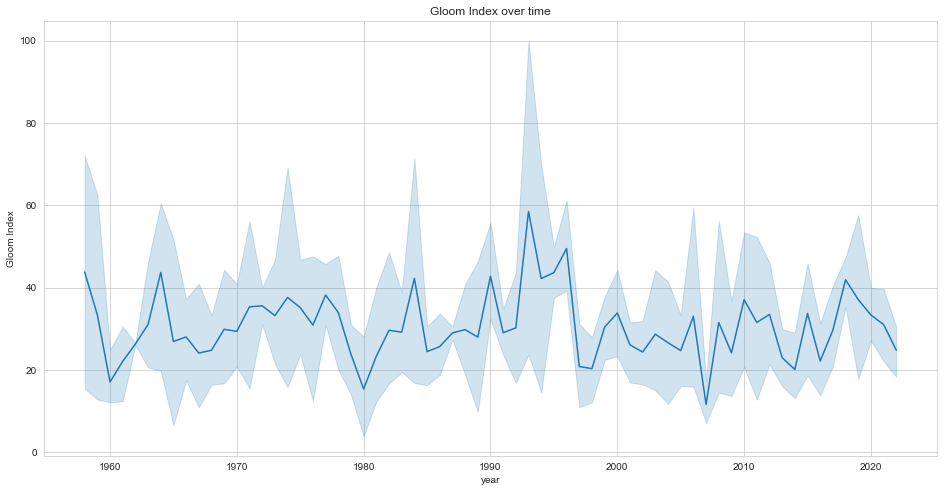

In [30]:
plt.figure(figsize=(16,8))
tg = sns.lineplot(data=analysis_df, x='year', y='gloom_index');
tg.set_ylabel("Gloom Index")
tg.set_title("Gloom Index over time")
plt.savefig("gloom_index_over_time.png", bbox_inches='tight')


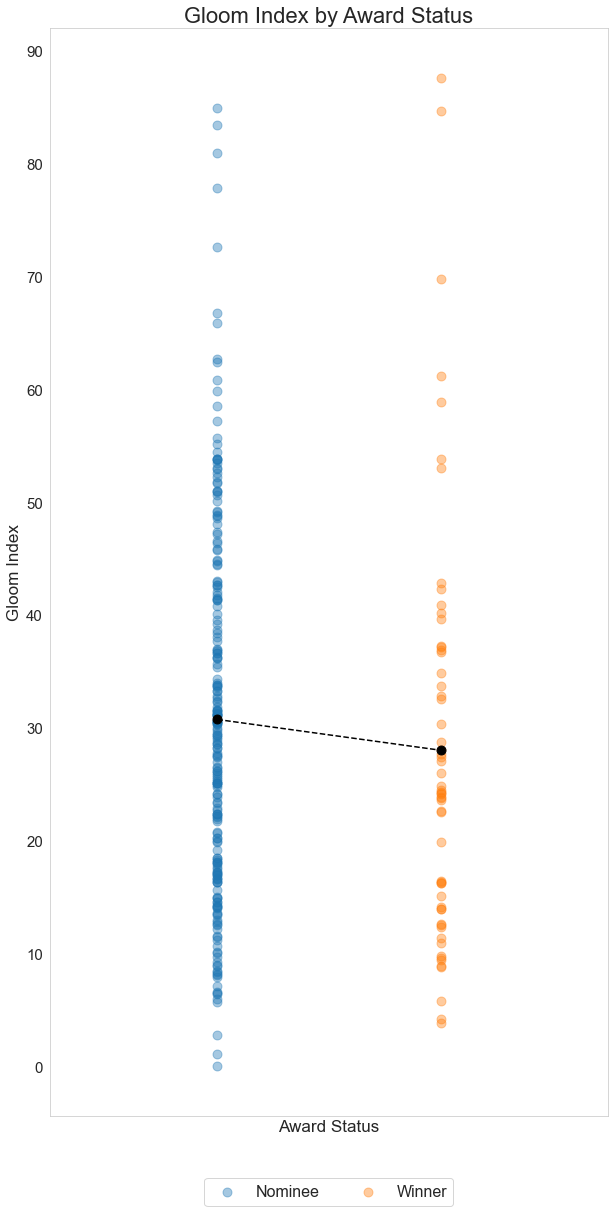

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

In [31]:
from make_diff_graph import make_diff_graph
from make_time_graph import make_time_graph

make_diff_graph(analysis_df)

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

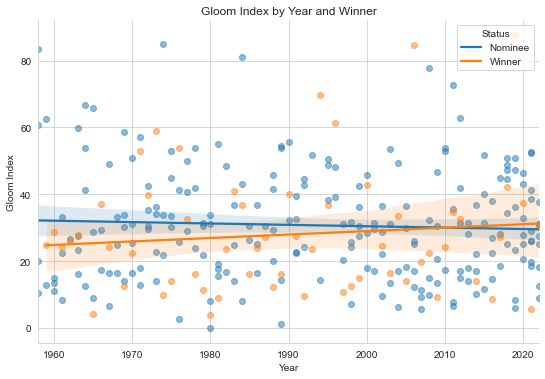

In [32]:
make_time_graph(analysis_df)

*Predictions: correlation between sentiment percentages and Grammy wins* 

<ipython-input-33-7572dd1ae90f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(analysis_df.corr(),


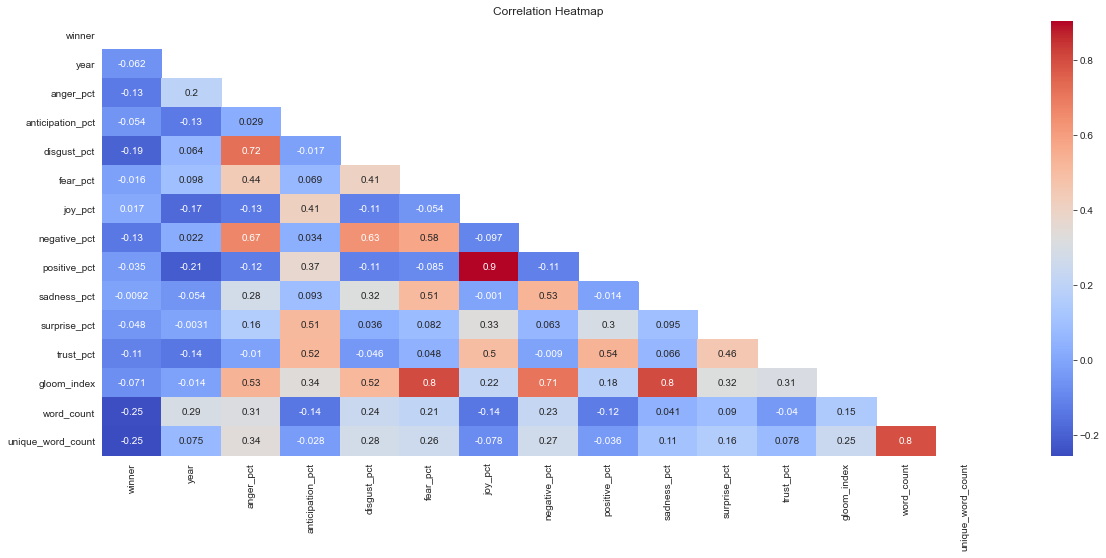

In [33]:
plt.figure(figsize = (20, 8))
mask = np.triu(np.ones_like(analysis_df.corr(numeric_only=True), dtype=bool))
heatmap = sns.heatmap(analysis_df.corr(),
                      mask=mask,
                      annot=True,
                      cmap='coolwarm')
heatmap.set_title('Correlation Heatmap');

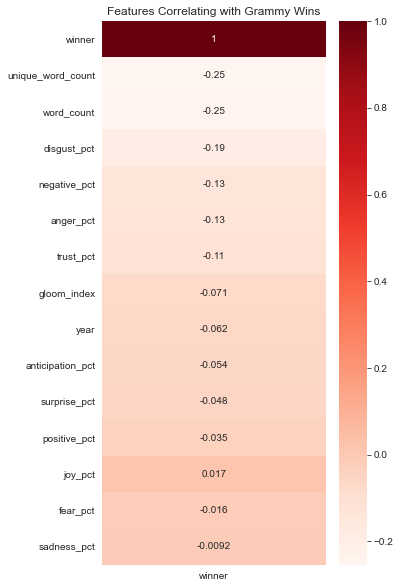

In [34]:
top_features = analysis_df.corr(numeric_only=True)[['winner']].sort_values(by='winner', key = abs, ascending=False)
plt.figure(figsize=(5, 10))
heatmap = sns.heatmap(top_features,
                      annot=True,
                      cmap='Reds')
heatmap.set_title('Features Correlating with Grammy Wins');
plt.yticks(rotation=0);

In [35]:
# split data set 
X = analysis_df.drop(['winner', 'title', 'artist', 'lyrics', 'preprocessed_lyrics', 'language', 'decade'], axis=1) 
y = analysis_df["winner"]  # This is the classification outcome: winner/nominee

# perform training and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# to print stats
feature_names = X.columns


In [36]:
# import XGBClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


# declare parameters
params = {
            # 'objective':'binary:logistic',
            # 'max_depth': 8,
            # 'alpha': 10,
            # 'learning_rate': 1.0,
            # 'n_estimators':200
            'solver': 'liblinear',
            'multi_class': 'ovr'
        }
            
# instantiate the classifier 
xgb_clf = LogisticRegression(**params)

# fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

# make predictions on test data
y_pred = xgb_clf.predict(X_test)

# check accuracy score
print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

/opt/anaconda3/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


XGBoost model accuracy score: 0.8448


In [37]:
X_test['predicted_outcome'] = y_pred
X_test


,year,anger_pct,anticipation_pct,disgust_pct,fear_pct,joy_pct,negative_pct,positive_pct,sadness_pct,surprise_pct,trust_pct,gloom_index,word_count,unique_word_count,predicted_outcome
264,1967,0.005795,0.024834,0.004139,0.009106,0.021523,0.017384,0.033940,0.014901,0.011589,0.021523,16.358083,468,356,0
277,1989,0.001786,0.030357,0.000001,0.008929,0.037500,0.016071,0.057143,0.005357,0.007143,0.035714,14.251773,387,181,0
11,2012,0.003205,0.009615,0.000001,0.060897,0.006410,0.064103,0.006410,0.083333,0.009615,0.003205,62.731726,226,70,0
296,2006,0.000001,0.023411,0.006689,0.003344,0.023411,0.030100,0.053512,0.006689,0.020067,0.020067,12.203046,213,96,0
75,1978,0.072464,0.053140,0.053140,0.019324,0.048309,0.077295,0.067633,0.014493,0.019324,0.057971,41.795679,146,89,0
107,2002,0.023569,0.030303,0.023569,0.033670,0.023569,0.063973,0.060606,0.023569,0.013468,0.020202,36.622128,189,65,0
12,1959,0.007463,0.097015,0.022388,0.022388,0.104478,0.044776,0.134328,0.059701,0.037313,0.089552,62.427337,130,76,0
323,2004,0.001372,0.012346,0.002743,0.006859,0.008230,0.002743,0.030178,0.001372,0.004115,0.027435,6.409017,416,156,0
110,1973,0.028455,0.044715,0.028455,0.024390,0.032520,0.069106,0.069106,0.016260,0.040650,0.032520,36.215815,213,137,0
38,1970,0.000001,0.029255,0.002660,0.042553,0.077128,0.047872,0.082447,0.045213,0.005319,0.066489,50.970830,277,113,0
